<a href="https://colab.research.google.com/github/jdelebec/Project_2_advanced_machine_learning/blob/main/Project2_Advanced_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projet Advanced Machine Learning: Text synthesis
Simon Hervé  
Jean-Louis Delebecque  
Lien du github: 


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  1) Extraction des textes

On utilise la librairie Beautifulsoup pour extraire les données des XML.

In [19]:
# Packages for extracting data

import bs4
from bs4 import BeautifulSoup as bs
import lxml
import pandas as pd
import numpy as np

Afin de pouvoir travailler à deux sur le projet nous avons fait un google collabs partagé, d'ou la présence de deux path


In [20]:
simon_path = "/content/drive/MyDrive/ESILV S9/Advanced machine learning/corpus_taln_v1.tei.xml"
jl_path = "/content/drive/MyDrive/Advanced_ml/corpus_taln_v1.tei.xml"

In [21]:
#Pour JL
content = []
with open(jl_path, "r") as file:
  content = file.readlines()
  content = "".join(content)
  soup = bs(content, "lxml")

In [ ]:
#Pour Simon
content = []
with open(simon_path, "r") as file:
  content = file.readlines()
  content = "".join(content)
  soup = bs(content, "lxml")

La stratégie d'extraction des données est d'appliquer la fonction get_text() à chaque balise dans le corpus_taln_v1.tei.xml. La function va extraire le titre de la publication, le nom du ou des auteurs quand il y en a, l'email du ou des auteurs si il y en a. De plus, elle récupère les abstract en français et en anglais ainsi que les mots clés en français et en anglais. Pour la partie text, la fonction compile tous les textes en une partie.

In [22]:
def get_text(soup):

  dic = {}

  #================================================================
  language = soup.fin
  title = soup.find("title").get_text().replace("\n\t", "")
  author = soup.find("author")
  author_names = author.find_all("name")
  tab_name = []
  for name in author_names:
    tab_name.append(name.get_text())
  publication_place = soup.find("pubplace").get_text()
  publication_date = soup.find("publicationstmt").find("date").get_text()
  editor_name = soup.find("editor").find("name").get_text()
  monogr_title = soup.find("monogr").find("title").get_text()
  monogr_date = soup.find("monogr").find("date").get_text()
  abstract = soup.find("text").find_all("div", {"type": "abstract"})
  abstract_fr = abstract[0].find("p").get_text().replace("\n\t", "")
  abstract_eng = abstract[1].find("p").get_text().replace("\n\t", "")
  keywords = soup.find("text").find_all("div", {"type": "keywords"})
  keywords_fr = keywords[0].find("p").get_text().replace("\n\t", "")
  keywords_eng = keywords[1].find("p").get_text().replace("\n\t", "")
  sections = soup.find_all("div", {"type": "section"})
  tab = []

  #============================================================

  # Introduction - Sections - Conclusion
  sections = soup.find_all("div", {"type": "section"})
  for section in sections:
    # title section
    try:
      title_sec = section.get_text().split("\n")[2]
      tab.append(title_sec)
    except:
      pass
    # paragraph section
    try:
      parag_sec = section.find("p").get_text().replace("\n\t", "")
      tab.append(parag_sec)
    except:
      pass
    # Subsection
    try:
      subsections = section.find_all("div", {"type": "subsection"})
      for sub in subsections:
        # title subsection
        title_sub = sub.get_text().split("\n")[2]
        tab.append(title_sub)
      
        # paragraphs subsection
        paragraphs = sub.find_all("p")
        for parag in paragraphs:
          tab.append(parag.get_text().replace("\n\t", ""))
        
        # sub note
        try:
          notes = sub.find_all("note")
          for note in notes:
            tab.append(note.get_text())
        except:
          pass
    
    except:
      pass
    
    # note
    try:
      notes = section.find_all("note")
      for note in notes:
        tab.append(note.get_text())
    except:
      pass


  # Bibl

  try:
    bibl = soup.find("bibl").get_text()
    tab.append(bibl)
  except:
    pass

  #===============================================================

  dic["title"] = title
  dic["author_name"] =  ",".join(str(elem) for elem in tab_name)
  try:
    tab_email = []
    author_emails = author.find_all("email")
    for email in author_emails:
      tab_email.append(email.get_text().replace("\n", ""))
    dic["author_email"] =  ",".join(str(elem) for elem in tab_email)
  except:
    dic["author_email"] = None
  dic["publication_place"] = publication_place
  dic["publication_date"] = publication_date
  dic["editor_name"] = editor_name
  dic["monogr_title"] = monogr_title
  dic["monogr_date"] = monogr_date
  dic["abstract_fr"] = abstract_fr
  dic["abstract_eng"] = abstract_eng
  dic["keywords_fr"] = keywords_fr
  dic["keywords_eng"] = keywords_eng
  dic["text"] = " ".join(str(elem) for elem in tab)

  #>
  return dic


In [323]:
corpus = []
texts = soup.find_all("tei")
for text in texts:
  corpus.append(get_text(text))

On transforme ensuite le tableau de dictionnaires contenant les données en un dataframe grâce à la fonction DataFrame de la librairie pandas.

In [324]:
df = pd.DataFrame(corpus)

In [325]:
df.head()

,title,author_name,author_email,publication_place,publication_date,editor_name,monogr_title,monogr_date,abstract_fr,abstract_eng,keywords_fr,keywords_eng,text
0,\nÉléments de conception d'un système d'interp...,"Delphine Battistelli,Cyril Valliez","battiste@msh-paris.fr,valliez@msh-paris.fr",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nNous considérons dans notre travail la tâche...,None,None,None,Architecture globale du système \nLe modèle de...
1,\nInformatisation du dictionnaire explicatif e...,Gilles Sérasset,Gilles.Serasset@imag.fr,Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nNous donnons ici un aperçu du logiciel DECID...,None,None,None,Introduction \nDans le domaine de l'ingénieri...
2,\nConstruction d'une représentation sémantique...,"Pierre Zweigenbaum,Jacques Bouaud","pz@biomath.jussieu.fr,jb@biomath.jussieu.fr",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,1997,\nDiverses méthodes ont été proposées pour con...,None,None,None,
3,\nSystèmes de types pour la (lambda-)DRT ascen...,"Pascal Amsili,Nabil Hathout","amsili@linguist.jussieu.fr,hathout@inalf.cnrs.fr",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,1998,\nLe terme de lambda-DRT désigne un ensemble d...,None,None,None,Introduction \nLa « Théorie des Représentation...
4,\nUne grammaire TAG vue comme une grammaire Se...,"Marie-Hélène Candito,Sylvain Kahane","marie-helene.candito@linguist.jussieu.fr,sk@cc...",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,1998,"\nDans cet article, nous comparons deux modèle...",None,None,None,Introduction \nTAG est un formalisme initialem...


On enregistre le dataframe pour l'exporter.

In [ ]:
#Pour Simon
df.to_csv("/content/drive/MyDrive/ESILV S9/Advanced machine learning/corpus.csv")

In [326]:
#Pour JL
df.to_csv("/content/drive/MyDrive/Advanced_ml/corpus.cs")

On installe le lemmatizer fr_core_news_sm, mais on pourrait aussi utiliser le fr_core_news_md.

In [327]:
!python -m spacy download fr_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


## 2) Librairies

In [394]:
# Packages for processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt')
nltk.download("stopwords")
from nltk.corpus import stopwords
french_stopwords = set(stopwords.words("french"))
import unicodedata
import re
import spacy
import fr_core_news_sm 
nlp = fr_core_news_sm.load()

#Pour le modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

# Affichage graphique
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## 3) Processing et features engineering

Crée des fonctions qui font le processing classique de texte. Dans notre démarche on va essayer de voir l'incidence du processing sur les résultats. Pour cela on créer plusieurs wrappers où l'ordre d'appel des fonctions est différent. On fait cette démarche car on se rend compte qu'il y a de mauvaises transcriptions après processing avec par exemple issus qui devient i us.

In [329]:
# Processing

def remove_accents(text):
    
    norm = unicodedata.normalize('NFKD', str(text))
    ascii = norm.encode('ascii', 'ignore')
    text = ascii.decode('utf-8', 'ignore')
    return text

def lower_letters(text):
    
    return text.lower()

def drop_slash_n(text):
    
    return re.sub(r"\n", "", text)

def drop_special_carac(text):
    
    return re.sub(r"[^a-zA-Z\d\s]", " ", text)

def drop_brackets(text):

    return re.sub(r"\[(.*?)\]", "", text)

def drop_extra_space(text):
    
    return re.sub(r"s{2,}", " ", text)

def remove_stop_words(text):
    
    text = word_tokenize(text)
    text = " ".join([word for word in text if not word in french_stopwords])
    return text

def lemmatize(text):
    
    text = nlp(text)
    text = " ".join([word.lemma_ for word in text])
    return text

def drop_double_space(text):
    return re.sub(' +', ' ', text)

def drop_single_char(text):
    return re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)

# =============================================================================

# Wrapper 

def processing1(text):
    
    text = str(text)
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_extra_space(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
    
    return text

def processing2(text):
    
    text = str(text)
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = remove_stop_words(text)
    text = lemmatize(text)
     
    return text

def processing3(text):
    
    text = str(text)
    text = lower_letters(text)
    text = remove_accents(text)
    text = remove_stop_words(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = lemmatize(text)
    
    return text

def processing4(text):
    
    text = str(text)
    text = remove_accents(text)
    text = lower_letters(text)
    text = drop_slash_n(text)
    
    return text

def processing5(text):
    
    text = str(text)
    text = lower_letters(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = lemmatize(text)
    
    return text

def processing6(text):
    
    text = str(text)
    text = lower_letters(text)
    text = lemmatize(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    
    return text

def processing7(text):

    text = str(text)
    text = drop_brackets(text)
    text = lower_letters(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_double_space(text)
    text = drop_single_char(text)
    
    return text

def processing8(text):

    text = str(text)
    text = drop_brackets(text)
    text = lower_letters(text)
    text = lemmatize(text)
    text = remove_stop_words(text)
    text = remove_accents(text)
    text = drop_slash_n(text)
    text = drop_special_carac(text)
    text = drop_double_space(text)
    text = drop_single_char(text)
    
    return text

On applique les différents processing qui génèrent une nouvelle colonne à chaque fois. On le sait de notre dernier projet le processing 8 est le meilleur on ne fait donc pas les autres

In [330]:
#df["abstract_fr_proc_1"] = df.apply(lambda x: processing1(x["abstract_fr"]), axis=1)
#df["abstract_fr_proc_2"] = df.apply(lambda x: processing2(x["abstract_fr"]), axis=1)
#df["abstract_fr_proc_3"] = df.apply(lambda x: processing3(x["abstract_fr"]), axis=1)
#df["abstract_fr_proc_4"] = df.apply(lambda x: processing4(x["abstract_fr"]), axis=1)
#df["abstract_fr_proc_5"] = df.apply(lambda x: processing5(x["abstract_fr"]), axis=1)
#df["abstract_fr_proc_6"] = df.apply(lambda x: processing6(x["abstract_fr"]), axis=1)
#df["abstract_fr_proc_7"] = df.apply(lambda x: processing7(x["abstract_fr"]), axis=1)
df["abstract_fr_proc_8"] = df.apply(lambda x: processing8(x["abstract_fr"]), axis=1)

In [331]:
df.shape

(1602, 14)

## 4) Suite du processing (projet 2)

En ce qui concerne le préprocessing nous nous étions uniquement foclaisé sur les abstract, pour ce nouveau problème il nous d'abord regarder plus en details les autres features

Très peu de valeurs renseigné dans les colonnes keywords_fr, keywords_eng et abstract_eng

In [332]:
df[df["keywords_fr"] != 'None'].count()[0]
# 1602 valeurs en tout 1475 none donc il n'y a que 127 valeurs non-null

1475

In [333]:
df[df["keywords_eng"] != 'None'].count()[0]

1449

In [334]:
df[df["abstract_eng"] != 'None'].count()[0]

1492

In [335]:
df[df["publication_date"]  == df["monogr_date"]].count()
# la colonne monogr_date et publication_date sont toujours les mêmes 

title                 1602
author_name           1602
author_email          1602
publication_place     1602
publication_date      1602
editor_name           1602
monogr_title          1602
monogr_date           1602
abstract_fr           1602
abstract_eng          1602
keywords_fr           1602
keywords_eng          1602
text                  1602
abstract_fr_proc_8    1602
dtype: int64

In [336]:
# On supprime donc les 4 colonnes 
del df['monogr_date']
del df["keywords_fr"]
del df["keywords_eng"]
del df["abstract_eng"]

In [337]:
df.head()

,title,author_name,author_email,publication_place,publication_date,editor_name,monogr_title,abstract_fr,text,abstract_fr_proc_8
0,\nÉléments de conception d'un système d'interp...,"Delphine Battistelli,Cyril Valliez","battiste@msh-paris.fr,valliez@msh-paris.fr",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,\nNous considérons dans notre travail la tâche...,Architecture globale du système \nLe modèle de...,considerer travail tache traitement automatiqu...
1,\nInformatisation du dictionnaire explicatif e...,Gilles Sérasset,Gilles.Serasset@imag.fr,Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,\nNous donnons ici un aperçu du logiciel DECID...,Introduction \nDans le domaine de l'ingénieri...,donner ici apercu logiciel decid developpe get...
2,\nConstruction d'une représentation sémantique...,"Pierre Zweigenbaum,Jacques Bouaud","pz@biomath.jussieu.fr,jb@biomath.jussieu.fr",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,\nDiverses méthodes ont été proposées pour con...,,divers methode avoir etre proposer construire ...
3,\nSystèmes de types pour la (lambda-)DRT ascen...,"Pascal Amsili,Nabil Hathout","amsili@linguist.jussieu.fr,hathout@inalf.cnrs.fr",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,\nLe terme de lambda-DRT désigne un ensemble d...,Introduction \nLa « Théorie des Représentation...,terme lambda drt designe ensemble methode perm...
4,\nUne grammaire TAG vue comme une grammaire Se...,"Marie-Hélène Candito,Sylvain Kahane","marie-helene.candito@linguist.jussieu.fr,sk@cc...",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,"\nDans cet article, nous comparons deux modèle...",Introduction \nTAG est un formalisme initialem...,article comparer deux modele linguistique util...


In [338]:
# Une autre étape il faut transformer la cible en int 
df['publication_date'] = df['publication_date'].astype(int)

In [339]:
df["publication_date"].describe()

count    1602.000000
mean     2009.431960
std         5.414435
min      1997.000000
25%      2005.000000
50%      2010.000000
75%      2014.000000
max      2019.000000
Name: publication_date, dtype: float64

Ici on apprend que le dataset est repartit sur 22 ans de 1997 à 2019 et la median et vers 2010

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               1602 non-null   object
 1   author_name         1602 non-null   object
 2   author_email        1602 non-null   object
 3   publication_place   1602 non-null   object
 4   publication_date    1602 non-null   int64 
 5   editor_name         1602 non-null   object
 6   monogr_title        1602 non-null   object
 7   abstract_fr         1602 non-null   object
 8   text                1602 non-null   object
 9   abstract_fr_proc_8  1602 non-null   object
dtypes: int64(1), object(9)
memory usage: 125.3+ KB


In [341]:
#On a split les auteurs et email (ce sont à peu près les mêmes données), afin d'obtenir plusieurs string si il y a eu plusieurs auteurs

df["author_name"] = df["author_name"].str.split(",")
df["author_email"] = df["author_email"].str.split(",")
df.head()

#A le fin du projet on c'est rendu compte que c'était inutile mais ça partait d'une bonne idée

,title,author_name,author_email,publication_place,publication_date,editor_name,monogr_title,abstract_fr,text,abstract_fr_proc_8
0,\nÉléments de conception d'un système d'interp...,"[Delphine Battistelli, Cyril Valliez]","[battiste@msh-paris.fr, valliez@msh-paris.fr]",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,\nNous considérons dans notre travail la tâche...,Architecture globale du système \nLe modèle de...,considerer travail tache traitement automatiqu...
1,\nInformatisation du dictionnaire explicatif e...,[Gilles Sérasset],[Gilles.Serasset@imag.fr],Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,\nNous donnons ici un aperçu du logiciel DECID...,Introduction \nDans le domaine de l'ingénieri...,donner ici apercu logiciel decid developpe get...
2,\nConstruction d'une représentation sémantique...,"[Pierre Zweigenbaum, Jacques Bouaud]","[pz@biomath.jussieu.fr, jb@biomath.jussieu.fr]",Grenoble,1997,Damien Genthial,4e conférence sur le Traitement Automatique de...,\nDiverses méthodes ont été proposées pour con...,,divers methode avoir etre proposer construire ...
3,\nSystèmes de types pour la (lambda-)DRT ascen...,"[Pascal Amsili, Nabil Hathout]","[amsili@linguist.jussieu.fr, hathout@inalf.cnr...",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,\nLe terme de lambda-DRT désigne un ensemble d...,Introduction \nLa « Théorie des Représentation...,terme lambda drt designe ensemble methode perm...
4,\nUne grammaire TAG vue comme une grammaire Se...,"[Marie-Hélène Candito, Sylvain Kahane]","[marie-helene.candito@linguist.jussieu.fr, sk@...",Paris,1998,Pierre Zweigenbaum,5e conférence sur le Traitement Automatique de...,"\nDans cet article, nous comparons deux modèle...",Introduction \nTAG est un formalisme initialem...,article comparer deux modele linguistique util...


In [342]:
# Penchons nous sur le features engineering des autres colonnes celles contenant du texte :  title, text (abstract a déjà subi 7 traitement differents)
df["title"] = df.apply(lambda x: processing8(x["title"]), axis=1)
df["title"][0]

'element conception systeme interpretation automatique texte image'

In [343]:
#Créons une colonne qui contient le titre + l'abstract
df["text_title_proc"] = df["title"] + df["abstract_fr_proc_8"]
df["text_title_proc"][0]

'element conception systeme interpretation automatique texte imageconsiderer travail tache traitement automatique viser construire partir texte issu corpus constat accident route interpretation compatible dernier proposer illustration sous forme sequence image fixe recherche etre fruit collaboration entre laboratoire universitaire entreprise prendre appui modele grammaire applicatif cognitif vise particulier expliquer certain niveau cognitif transfert entre representation image verbal revue question relatif transcription automatique verbal image renvoyer plus particulierement travail vandelois groupe langue raisonnement calcul universite paul sabatier ainsi al approche proposer systeme sprint plus proche encore preoccupation victorri enjalbert posent probleme animation visuel issu interpretation texte presenter article travers traitement exemple methode general analyse avoir adopter appuyer priorite connaissance linguistique texte prendre comme exemple etre suivant rouler partie droite

Nous decidons de nous concentrer uniquement sur les abstract et title, nous laissons la colonne abstract sans pre-processing au cas ou on voudrait utiliser un autre pre-processing pour la suite

#Modeling

## 1) Data split

In [344]:
#Dans les sections suivantes nous avons determiné qu'il était préferable de supprimer les lignes de l'année 1997
#En effet elles ne répresentent que 0.187% des données et lors du split aucune donnée de 1997 ne se retrouve dans les sets de validation ou test (20 % de 0.187 fait qu'il n'y a aucune valeur de 1997)
#On supprimer donc les lignes de 1997
df.drop(df[df["publication_date"] == 1997].index, inplace=True)

In [345]:
repart_dataset = ((df["publication_date"].value_counts()/df["publication_date"].describe()[0]) * 100)
print(repart_dataset)
#Pour verifier la repartition des dates (en %), on sait d'avant que cette colonne ne contient pas de valeur nulle

2011    7.317073
2010    6.504065
2009    6.504065
2013    6.441526
2014    5.941213
2015    5.753596
2007    5.503440
2005    5.440901
2012    5.440901
2004    5.378361
2018    5.253283
2006    5.065666
2008    4.127580
2003    4.002502
2017    3.564728
2002    3.564728
2016    3.377111
2001    3.314572
1999    2.876798
2019    2.376485
2000    1.438399
1998    0.813008
Name: publication_date, dtype: float64


In [346]:
#train test validation split
x_train, x_test, y_train, y_test  = train_test_split(df, df.iloc[:,4], stratify = df.iloc[:,4] , test_size=0.1, random_state=1) # 90 % train et 10 % test

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify = y_train , test_size=0.11 , random_state=1) # 0.9 * 0.11 = 0.099 (c'est le plus près qu'on ai puisse trouver)

#Astuce : on garde la colonne publication_date lors du split pour pouvoir stratifié sur les années et répartir en fonction des années
#On a bien le train, test et validation set qui respectent les 80/10/10

In [347]:
#ici on compare la répartition des années (données pour chaque années) des 3 datas obtenus
repart_train = ((x_train["publication_date"].value_counts()/x_train["publication_date"].describe()[0]) * 100)
repart_test = ((x_test["publication_date"].value_counts()/x_test["publication_date"].describe()[0]) * 100)
repart_val = ((x_val["publication_date"].value_counts()/x_val["publication_date"].describe()[0]) * 100)

repartition = pd.DataFrame({'dataset' : repart_dataset ,'train':repart_train, 'test':repart_test, "val" : repart_val })
repartition

,dataset,train,test,val
1998,0.813008,0.859375,0.625,0.628931
1999,2.876798,2.812500,3.125,3.144654
2000,1.438399,1.484375,1.250,1.257862
2001,3.314572,3.359375,3.125,3.144654
2002,3.564728,3.515625,3.750,3.773585
2003,4.002502,4.062500,3.750,3.773585
2004,5.378361,5.312500,5.625,5.660377
2005,5.440901,5.390625,5.625,5.660377
2006,5.065666,5.078125,5.000,5.031447
2007,5.503440,5.468750,5.625,5.660377


In [348]:
#Même comparaison pour les y (réponses)
repart_train_y = ((y_train.value_counts()/y_train.describe()[0]) * 100)
repart_test_y = ((y_test.value_counts()/y_test.describe()[0]) * 100)
repart_val_y = ((y_val.value_counts()/y_val.describe()[0]) * 100)

repartition_y = pd.DataFrame({'dataset' : repart_dataset ,'train':repart_train_y, 'test':repart_test_y, "val" : repart_val_y })
repartition_y

,dataset,train,test,val
1998,0.813008,0.859375,0.625,0.628931
1999,2.876798,2.812500,3.125,3.144654
2000,1.438399,1.484375,1.250,1.257862
2001,3.314572,3.359375,3.125,3.144654
2002,3.564728,3.515625,3.750,3.773585
2003,4.002502,4.062500,3.750,3.773585
2004,5.378361,5.312500,5.625,5.660377
2005,5.440901,5.390625,5.625,5.660377
2006,5.065666,5.078125,5.000,5.031447
2007,5.503440,5.468750,5.625,5.660377


In [ ]:
#On peut le voir ici la répartition des données a légérement changé mais pas enormement 
#On ne retrouve aucun changement crucial: 
#Il ne manque aucune année à part 1997 dans le test set mais cette année est très peu représenté dans le dataset original)
#Aucun pourcentage n'est non plus anormalement haut ou bas, vue la repartition 80/10/10 il va etre dur de faire mieux
#Après observation nous avons rajouté le paarmetre statify dans la fonction de split amenant au dernier resultats bien meilleur que les précédents (screen dans le rapport)
#La séparation en train, test et validation set est optimale pour x et y

In [101]:
#Peut etre retirer les données de 1997 dans le train set (puisqu'il ne sont pas présents dans le dataset y )
#Comme dit plus haut c'est ici que nous avons choisis de supprimer les lignes de 1997 (voir screen dans rapport)

In [349]:
#On retire maintenant la colonne publication_date des sets x 
del x_train["publication_date"]
del x_test["publication_date"]
del x_val["publication_date"]

## 2) Word2Vec

In [362]:
from gensim.models import Word2Vec, FastText

In [494]:
#Essayons de faire un word2Vec
#On a besoin de tokennizer le texte pour utiliser le word2Vec
text = "element conception systeme interpretation automatique texte imageconsiderer travail tache traitement automatique"
from nltk.tokenize import word_tokenize
test = word_tokenize(text)
test

['element',
 'conception',
 'systeme',
 'interpretation',
 'automatique',
 'texte',
 'imageconsiderer',
 'travail',
 'tache',
 'traitement',
 'automatique']

In [ ]:
#Tokennize toutes une colonnes
x_train_tk = x_train.copy()
i = 0 
x_train_tk["text_title_proc_tk"] = x_train_tk["text_title_proc"]
for row in x_train_tk["text_title_proc"]:
    row = word_tokenize(row)
    x_train_tk["text_title_proc_tk"][i] = row
    i = i +1

x_train_tk["text_title_proc_tk"]

In [496]:
#Word2Vec
w2v = Word2Vec(x_train_tk["text_title_proc_tk"], min_count=1, size = 5)
print(w2v)

Word2Vec(vocab=7323, size=5, alpha=0.025)


In [497]:
words = list(w2v.wv.vocab)
print(words)

['the', 'mitkov', 'algorithm', 'for', 'anaphora', 'resolution', 'in', 'portuguesenone', 'o', 'r', 'd', 'n', 'a', 'c', 'e', 'm', 't', ' ', 'p', 's', 'y', 'i', 'l', 'g', 'u', 'b', 'x', 'v', 'h', 'f', 'q', '7', '6', '2', '1', '5', 'acquisition', 'lexiqu', 'bilingue', 'expression', 'polylexicale', 'application', 'traduction', 'automatique', 'statistiquearticle', 'decrire', 'methode', 'permettre', 'acquerir', 'epls', 'partir', 'corpus', 'parallele', 'francais', 'anglais', 'identifier', 'premier', 'temps', 'epl', 'chaque', 'partie', 'ensuite', 'proposer', 'algorithme', 'alignement', 'assurer', 'mise', 'correspondance', 'mesurer', 'apport', 'construit', 'evaluation', 'baser', 'tache', 'statistique', 'tas', 'etre', 'mener', 'etudier', 'performance', 'trois', 'strategie', 'dynamique', 'statique', 'integrer', 'lexique', 'systeme', 'experience', 'cadre', 'montrent', 'unite', 'ameliorent', 'significativement', 'qualite', 'cetlef', 'fr', 'diagnostic', 'erreur', 'declinaison', 'tcheque', 'outil', 'e

In [ ]:
#Nous ne poursuivons pas le word2Vec pour le moment, nous avons de meilleurs pistes sur le tfd-idf

Approche "numérique", ce problème est complexe pour le data scientist car il lui rappelle des problèmes qui ne sont pas du nlp (prediction de int), mais il s'agit bel et bien d'un problème de reconnaisance de language. Une solution moins tourné vers l'études des textes auaraient été de chercher des elements temporels dans les textes et avec les temps de conjuguaison essayer de se situer dans le temps (dichotomie), mais il faudrait enormement d'element temporel et ce n'est pas le but ici.

In [ ]:
#Approche "numérique", ce problème est complexe pour le data scientist car il lui rappelle des problèmes qui ne sont pas du nlp (prediction de int), mais il s'agit bel
#et bien d'un problème de reconnaisance de language. Une solution moins tourné vers l'études des textes auaraient été de chercher des elements temporels et avec les temps de conjuguaison essayer de se situer dans le temps (dichotomie), 
#mais il faudrait enormement d'element temporel et ce n'est pas le but ici

## 3) TF-IDF + Random_Forest_Classifier

In [443]:
#Nous utilisons une pipeline, pour créer le tf-idf
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(CountVectorizer(), TfidfTransformer())
pipe.fit(x_train["text_title_proc"])
feat_train = pipe.transform(x_train["text_title_proc"])
feat_train.shape

(1280, 8201)

In [ ]:
#Ce deuxième TF-IDF fournit donc une matrice avec moins de colonnes (qui fait la même chose que la pipeline) est pour si nous voulions faire des test sur abstract ou title séparemment

#TF-IDF sur la colonne crée abstract + title
#Convert a collection of text documents to a matrix of token counts
#count_vect_title = CountVectorizer()
#x_train_counts_title = count_vect_title.fit_transform(x_train.title)


#abstract
#count_vect_abstract = CountVectorizer()
#x_train_counts_abstract = count_vect_abstract.fit_transform(x_train.abstract_fr_proc_8)
#x_train_counts_abstract.shape
#x_train_counts_title.shape

#tfidf_transformer = TfidfTransformer()
#x_train_tfidf_title = tfidf_transformer.fit_transform(x_train_counts_title)
#x_train_tfidf_title.shape
#Document-Term matrix 

#abstract
#tfidf_transformer_abstract = TfidfTransformer()
#x_train_tfidf_abstract = tfidf_transformer_abstract.fit_transform(x_train_counts_abstract)
#x_train_tfidf_abstract.shape

In [444]:
feat_train.min(), feat_train.max()

(0.0, 0.8663567094105553)

In [445]:
feat_test = pipe.transform(x_test["text_title_proc"])
feat_test.shape

(160, 8201)

In [446]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(feat_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [447]:
clf.score(feat_test, y_test)

0.1125

In [448]:
prediction = clf.predict(feat_test)
prediction

array([2000, 2004, 2011, 2011, 1999, 2010, 2001, 2005, 2007, 2008, 2009,
       2003, 2005, 2010, 2004, 2004, 2018, 2015, 2009, 2014, 2006, 2018,
       2011, 2006, 2010, 2011, 2007, 2013, 2005, 2011, 2011, 2010, 2008,
       2010, 1999, 2010, 2006, 2009, 2010, 1999, 2004, 2009, 2006, 2013,
       2009, 2015, 1999, 2015, 2011, 2009, 2003, 2010, 1999, 2015, 2007,
       2014, 2004, 2010, 2014, 2011, 2013, 2013, 2009, 2014, 2013, 2013,
       2012, 2011, 2011, 2006, 2010, 2006, 2015, 2006, 2002, 2009, 2009,
       2004, 2011, 2009, 2014, 2011, 2007, 2011, 2016, 2011, 2004, 2013,
       2011, 2013, 2009, 2005, 2011, 2009, 2009, 2011, 2012, 2012, 2015,
       2004, 2004, 2010, 2005, 2011, 2009, 2010, 2010, 2010, 2013, 2013,
       2004, 2005, 2010, 2009, 2009, 2003, 2011, 2004, 2008, 2013, 2013,
       2011, 2013, 2007, 2011, 2012, 2018, 2005, 2009, 2014, 2002, 2018,
       2005, 2010, 2013, 2011, 2007, 2004, 2011, 2012, 1999, 2007, 2006,
       2009, 2012, 1999, 2005, 2012, 2011, 2018, 20

In [449]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)

In [450]:
def get_cm(model, y_test, y_pred):
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)
    plt.xlabel("Prédictions")
    plt.ylabel("Originals")
    plt.title(f"Modèle {model}\nAccuracy:{accuracy_score(y_test, y_pred):.3f}")
    plt.show()


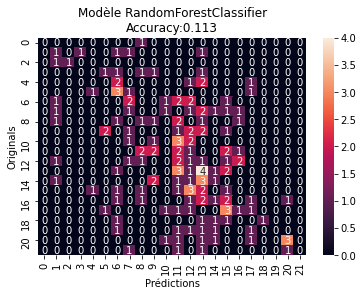

In [451]:
get_cm("RandomForestClassifier",y_test,prediction)

## 4) Optimisation des features

In [470]:
#Pour enqueter sur la pertinence regardons par exemple si nous prenions l'endroit de publication
pipe.fit(x_train["publication_place"])
feat_train2 = pipe.transform(x_train["publication_place"])
feat_train2.shape

(1280, 28)

In [471]:
feat_test2 = pipe.transform(x_test["publication_place"])
feat_test2.shape

(160, 28)

In [472]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=50)
clf2.fit(feat_train2, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [474]:
clf2.score(feat_test2, y_test)
#Cela ne change pas grand chose et au vu du peu d'information présente dans la colonnes publication_place ont sait de base que cette précision et fortement biasé

0.96875

Essayons sur titre et abstract separement 

In [ ]:
#Nous utilisons une pipeline, pour créer le tf-idf de title

pipe.fit(x_train["title"])
feat_train_title = pipe.transform(x_train["title"])
feat_train_title.shape

In [487]:
feat_test_title = pipe.transform(x_test["title"])
feat_test_title.shape

(160, 2314)

In [488]:
clf2_title = RandomForestClassifier(n_estimators=50)
clf2_title.fit(feat_train_title, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [489]:
clf2_title.score(feat_test_title, y_test)
#Très mauvais resultats

0.03125

In [493]:
#Nous utilisons la pipeline, pour créer le tf-idf de abstract

pipe.fit(x_train["abstract_fr_proc_8"])
feat_train_abstract = pipe.transform(x_train["abstract_fr_proc_8"])
#feat_train_abstract.shape

feat_test_abstract = pipe.transform(x_test["abstract_fr_proc_8"])

clf2_abstract = RandomForestClassifier(n_estimators=50)
clf2_abstract.fit(feat_train_abstract, y_train)

clf2_abstract.score(feat_test_abstract, y_test)

#le résultat n'est pas très mauvais, légérement moins précis que pour le texte contenant l'abstract et le title

0.1

Nous choissisons donc de focaliser nos test sur la colonne "text_title_proc" la colonne contenant le texte et le titre

In [ ]:
#Effectuons un grid search nur notre meilleur modèle pour optimiser les hyperparamètres

## 5) Optimisation des paramètres

In [387]:
#On effectue donc notre gridsearch sur notre premier modèle: clf

param_grid = { 
    'n_estimators': [50 , 100,  150 , 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [50,100,150,200
    ]
}
GSC = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
GSC.fit(feat_train, y_train)
print(GSC.best_params_)

{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 200}


In [390]:
clf_final = RandomForestClassifier(max_depth=100 , max_features =  'sqrt', n_estimators = 200)
clf_final.fit(feat_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [391]:
clf_final.score(feat_test, y_test)
#On a essayé plusieurs paramètres dans le gridsearch ça n'a jamais dépassé 0.1125 ce qui est notre meilleur score

0.1125

## 6) SVM

In [429]:
pd.set_option('display.max_rows', 1500)

In [ ]:
seed = 1

model = SVC(random_state=seed)
results = []
for i in range(1, 500):
  vect = CountVectorizer(max_features=i, max_df=0.15)
  X_train_CV = vect.fit_transform(x_train["text_title_proc"])
  X_test_CV = vect.transform(x_test["text_title_proc"])
  X_val_CV = vect.transform(x_val["text_title_proc"])
  model.fit(X_train_CV, y_train)  
  y_pred = model.predict(X_test_CV)
  acc = accuracy_score(y_test, y_pred)
  results.append([i, acc])
results = pd.DataFrame(results, columns=["i", "acc"])

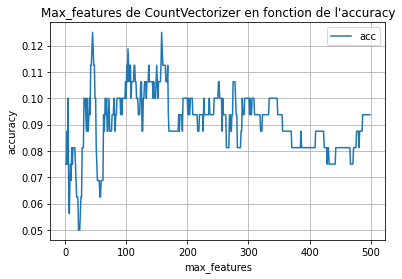

In [430]:
results.plot(x = "i", y="acc", grid=True)
plt.title("Max_features de CountVectorizer en fonction de l'accuracy")
plt.xlabel("max_features")
plt.ylabel("accuracy")
plt.show()

In [442]:
results.loc[results['acc'] == results['acc'].max()]

,i,acc
44,45,0.125
157,158,0.125


In [ ]:
#On trouve une accuracy de 0.125 quand l'hyper-paramètres max_features est égale à 45 ou 158
